In [1]:
import os, json, random, time

from datetime import datetime
from datetime import timedelta
import subprocess as sp
from pathlib import Path

from decimal import Decimal

import requests
import pandas as pd
import numpy as np
from IPython.display import HTML, display


import plotly.express as px
import chart_studio.plotly as py

In [2]:
_repo_root = Path(os.environ['CURR_REPO_ROOT'])
us_gdp_parq_path = _repo_root / 'gdp_data' / 'US_Q1_2021_BEA.parq'
us_gdp_orc_path = _repo_root / 'gdp_data' / 'US_Q1_2021_BEA.orc'



----
----
----
----
# read src

In [3]:
pddf = pd.read_parquet(path=str(us_gdp_parq_path), engine='pyarrow')

In [12]:
HTML(pddf.head(12).to_html(index=False))

Sector,gdp_q1 (Billions USD)
"Finance, insurance, real estate, rental, and leasing",7_874.30
Manufacturing,6_409.30
Professional and business services,4_504.80
Real estate and rental and leasing,4_368.40
Government,4_264.60
Real estate,4_008.70
Finance and insurance,3_505.90
Durable goods,3_345.00
Nondurable goods,3_064.30
"Educational services, health care, and social assistance",3_047.60


----
----
----
----
# Bar plot example

In [18]:
pddf.columns[0]

'Sector'

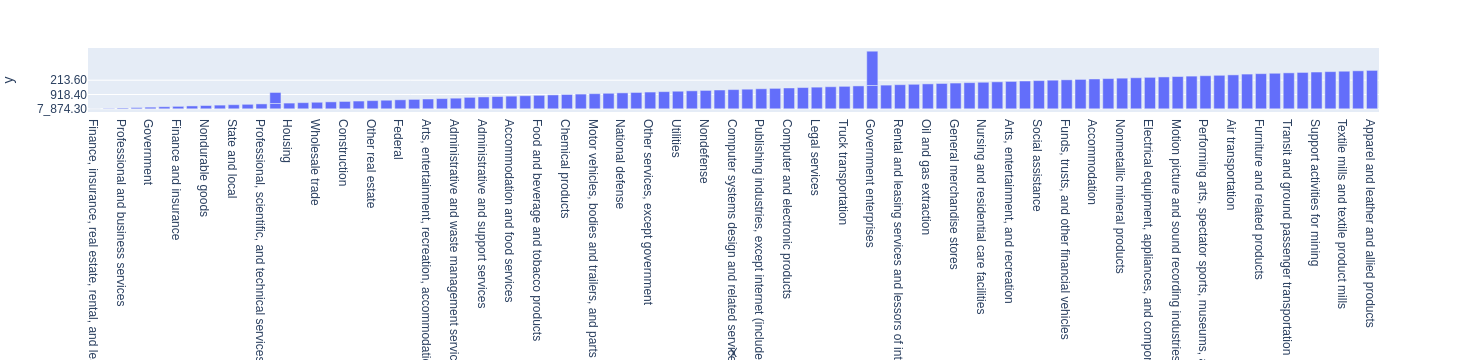

In [20]:
fig = px.bar(x=pddf[pddf.columns[0]], y=pddf[pddf.columns[1]])
fig.show()

0     Finance, insurance, real estate, rental, and l...
1                                         Manufacturing
2                    Professional and business services
3                    Real estate and rental and leasing
4                                            Government
5                                           Real estate
6                                 Finance and insurance
7                                         Durable goods
8                                      Nondurable goods
9     Educational services, health care, and social ...
10                                      State and local
11                    Health care and social assistance
12     Professional, scientific, and technical services
13                                   General government
14                                              Housing
15                                         Retail trade
16                                      Wholesale trade
17                                          Info

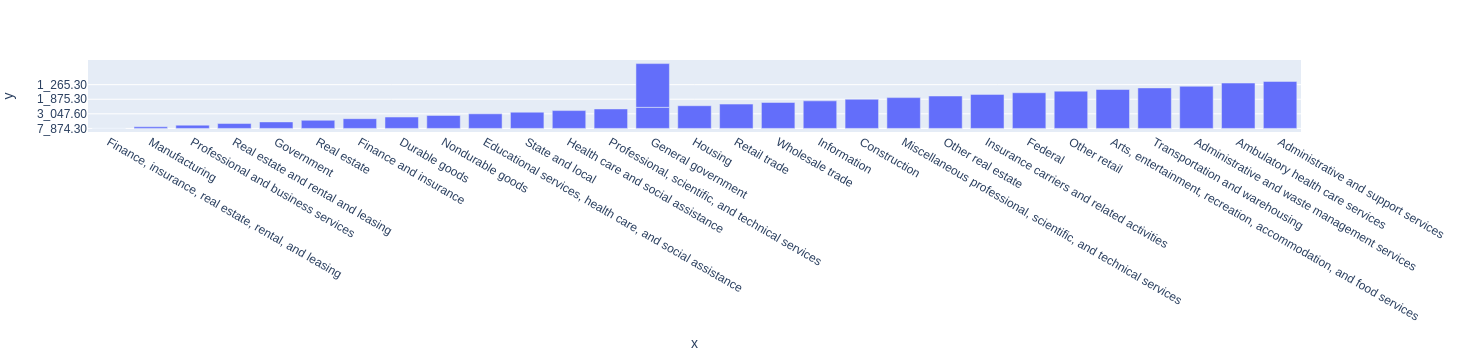

In [21]:
fig = px.bar(x=pddf.head(30)[pddf.columns[0]], y=pddf.head(30)[pddf.columns[1]])
fig.show()

In [22]:
HTML(pddf.to_html(index=False))

Sector,gdp_q1 (Billions USD)
"Finance, insurance, real estate, rental, and leasing",7_874.30
Manufacturing,6_409.30
Professional and business services,4_504.80
Real estate and rental and leasing,4_368.40
Government,4_264.60
Real estate,4_008.70
Finance and insurance,3_505.90
Durable goods,3_345.00
Nondurable goods,3_064.30
"Educational services, health care, and social assistance",3_047.60
